In [16]:
from sympy import *
import matplotlib.pyplot as plt
from sympy.plotting import plot3d
from math import log, exp

In [2]:
2**30

1073741824

In [4]:
x,y = symbols('x y')

In [7]:
f = 2*x+3*y

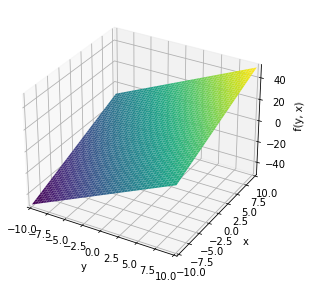

In [8]:
plot3d(f)

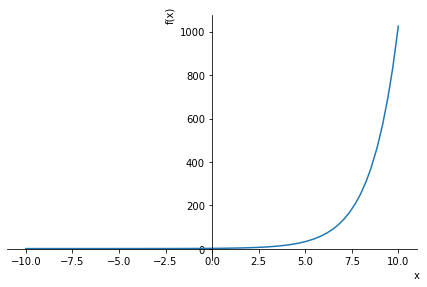

In [9]:
g = 2**x+1
plot(g)

## Sumowanie w SymPy

In [10]:
i,n = symbols('i n')
suma = Sum(2*i, (i, 1, n))

In [11]:
suma

Sum(2*i, (i, 1, n))

In [12]:
suma2 = Sum(10**i, (i,2,10))

In [13]:
suma2

Sum(10**i, (i, 2, 10))

## Wynik sumy

In [14]:
wynik_sm_1 = suma.subs(n, 5)
wynik_sm_1

Sum(2*i, (i, 1, 5))

In [15]:
print(wynik_sm_1.doit())

30


## Upraszczanie wyrażeń w sympy

In [16]:
wyrazenie = x**2 / x**5

In [17]:
wyrazenie

x**(-3)

In [18]:
wyr2 = 4**0.5
wyr2

2.0

## Logarytmy

In [20]:
x = log(16, 4)
x

2.0

In [23]:
y = log(20, 3)
y

2.7268330278608417

In [26]:
z = log(x, 4)
z

0.5

## Liczba eulera

In [3]:
p = 100
r = .2
t = 2.0
n = 12
a = p * (1 + (r/n)) ** (n * t)
a

148.69146179463576

In [5]:
n = 365

In [8]:
def  odsetki(p = 100, r = .2, t = 2.0, n =12):
    return p * (1 + (r/n)) ** (n * t)

In [9]:
odsetki(n=365)

149.16612786515807

In [10]:
odsetki(n=8760)

149.18178857773455

In [11]:
odsetki(n=525600)

149.182458398811

In [12]:
def odestki_e(p=100, r=.2, t=2.0):
    return p * exp(r * t)

In [14]:
odestki_e()

149.18246976412703

In [15]:
def graniczne(n):
    return (1 + 1/n) ** n

In [16]:
graniczne(n=100)

2.7048138294215285

In [17]:
graniczne(n=1000)

2.7169239322355936

In [18]:
graniczne(10000)

2.7181459268249255

In [19]:
graniczne(1000000)

2.7182804690957534

## Logarytmy naturalne

In [21]:
log(10) # jesli nie sprecyzujemy wartosci podstawy logarytmu
#, wartosc druga, to jego podstawa bedzie liczba eulera

2.302585092994046

## Granice


In [2]:
x = symbols ('x')
f = 1/x
wynik = limit(f, x, oo)
wynik

0

### Liczba eulera w granicach

In [3]:
n = symbols('n')
f = (1 + (1/n))**n
wynik = limit(f, n, oo)
wynik

E

In [4]:
wynik.evalf()

2.71828182845905

## Pochodne

Nachylenie funkcji - tempo zmiany w dowolnym punkcie funkcji

* Przydatna w ML, zwłaszcza w gradiencie prostym, regresji liniowej, logistycznej, sieciach neuronowych
* Nachylenie =0 oznacza minimum lub maksimum zmiennej wejściowej


In [5]:
def pochodnax(f, x, rozmiar_kroku):
    return (f (x + rozmiar_kroku) - f(x)) / ((x + rozmiar_kroku) -x)

In [7]:
def fun(x):
    return x**2

In [8]:
pochodnax(f= fun, x=2, rozmiar_kroku= .00001)

4.000010000000827

#### Funkcja pochodnej rozbita na poszczególne mini działania

Wzór na obliczenie pochodnej wygląda następująco:

m = y2- y1/ x2-x1, gdzie y= f(x)

Stąd jeśli chcemy obliczyyć nachylenie krzywej, to wyznaczamy możliwie najmniej oddaloną od punktu x, odległość (im jest ona zmniejsza, tym bliżej prawdziwej wartości nachylenia w punkcie x jesteśmy) x2. 

Różnica między x2 a x1 (oryginalnym punktem) ląduje w mianowniku. 
Różnica z wartości z osi y, czyli outputy funkcji z x1 i x2, ląduje w liczniku. 

Wynnik dzielenia tego ułamka to nasze nachylenie m. 

In [2]:
ins =(2+.00001) **2
ins

4.0000400001

In [7]:
mifx = (2**2)
mifx

4

In [8]:
licznik = ins-mifx
licznik

4.000010000027032e-05

In [6]:
mianownik = ((2 + 0.00001) - 2)
mianownik

1.0000000000065512e-05

In [9]:
licznik/mianownik

4.000010000000827

#### Obliczanie pochodnych w sympy

In [11]:
x = symbols('x')
f = x**2
dx_f = diff(f)
dx_f

2*x

SymPy oblicza dla nas wzór na pochodną z funkcji wykładniczej x**2. 

## Pochodne cząstkowe

In [20]:
x,y = symbols('x y')
f = 2*x**3 + 3*y**3

In [21]:
dx_f = diff(f, x)
dy_f = diff(f, y)

In [22]:
dx_f

6*x**2

In [23]:
dy_f

9*y**2

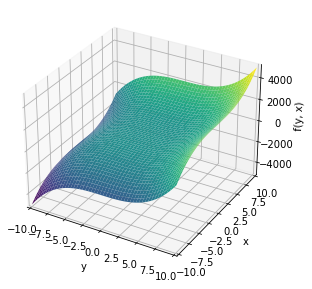

In [24]:
plot3d(f)

Czyli dla wartosci x,y równych 1,2. Nachylenie m względem x będzie równe 6(1)**2= 6 a nachylenie m względem y to 9(2)**2= 36. 

!pamiętaj o kolejności działań! potęgowanie przed mnożeniem

#### Używanie granic do obliczania pochodnych

In [29]:
# Obliczania nachylenia przy użyciu granicy
x, s = symbols('x s')
f = x**2
nachylenie_f = (f.subs(x, x+s) -f)/((x+s) -x)

In [26]:
nachylenie_2 = nachylenie_f.subs(x,2)
nachylenie_2

((s + 2)**2 - 4)/s

gdzie s = przyrost
x = 2
f(x) = y = x**2 = 4

i wg wzrostu na nachylenie m

(y2 -y1)/ (x2-x1)

(f(x+krok) - f(x))/(x+krok)-x)

((x+s)**2 - (x**2))/(x+s) -x

In [28]:
limit(nachylenie_2, s, 0)

4

In [30]:
# Obliczania pochodnej przy użyciu granicy

In [31]:
limit(nachylenie_f, s, 0)

2*x

## Reguła łańcuchowa

Kluczowe w przypadku trenowania sieci neuronowych - wagi i biasy. Umożliwia szybsze znajdowanie pochodnych poszczególnych węzłów sieci - poprzez pomnożenie ich w każdym węźle. 

Mamy dwie funkcje:
y = x**2 + 1
z = y**3 - 2

Funkcja y występuje zarówno w kontekście funkcji wejściowej, jak wyjściowej. Dzięki temu możemy podstawić ją w funkcji z. 

In [34]:
# Pochodna wzgledem x
z = (x**2 + 1)**3 - 2
dz_dx = diff(z, x)
dz_dx

6*x*(x**2 + 1)**2

Możliwe jest również obliczenie pochodnej funkcji względem x, gdy obliczymy pochodne obu funkcji i pomnożymy je przez siebie.

In [35]:
f = x**2 + 1
dy_dx = diff(f, x)
dy_dx

2*x

In [36]:
z = y**3 - 2
dz_dy = diff(z, y)
dz_dy

3*y**2

In [37]:
dz_dy*dy_dx

6*x*y**2

Gdy podstawimy funkcję y po powyższy iloczyn pochodnych, to otrzymamy wyrażenie 6x(x**2+1)**2

In [39]:
# pochodna z regula lancuchowa
(dy_dx * dz_dy).subs(y, f)

6*x*(x**2 + 1)**2

In [41]:
# pochodna bez reguly lancuchowej
diff(z.subs(y, f))

6*x*(x**2 + 1)**2

## Całki
Obliczanie pola obszaru pod funkcją

In [42]:
def przyblizenie_calki(a,b, n, f): #poczatek, koniec zakresu, liczba elementow, calkowana funkcja
    delta_x = (b-a)/n
    suma = 0
    
    for i in range(1, n+1):
        pkt_srodkowy = 0.5 * (2 * a + delta_x * (2 * i -1))
        suma += f(pkt_srodkowy)
        
    return suma * delta_x

In [45]:
def funkcja(x):
    return x**2 + 1

In [46]:
przyblizenie_calki(0, 1, 5, funkcja)

1.33

In [47]:
przyblizenie_calki(0, 1, 1000, funkcja)

1.333333250000001

In [48]:
przyblizenie_calki(0, 1, 1000000, funkcja)

1.3333333333332733

## Całki w SymPy

In [51]:
x = symbols('x')
f = x**2+1
integrate(f, (x,0,1))

4/3

## Obliczanie całek przy użyciu granic

In [53]:
x, i, n = symbols('x i n')
f = x**2 +1
dolny, gorny = 0, 1

# Obliczamy szerokosc i wysokosc kazdego prostokata o indeksie i
delta_x = ((gorny - dolny)/n)
x_i = (dolny + delta_x * i)
fx_i = f.subs(x, x_i)
fx_i

i**2/n**2 + 1

In [56]:
# Iterujemy po wszystkich n prostokatach i sumujemy ich pola
liczba_prsokatow = Sum(delta_x * fx_i, (i, 1, n)).doit()
liczba_prsokatow

1 + (n**3/3 + n**2/2 + n/6)/n**3

In [57]:
# Obliczamy pole, zawiekszamy liczbe
# prostokatow n do nieskonczonosci
limit(liczba_prsokatow, n, oo)

4/3

## Ćwiczenia

In [60]:
x**7*x**-5

x**2

In [65]:
81**0.5

9.0

In [66]:
25**3

15625

In [67]:
import numpy as np

In [68]:
sqrt(25**3)

125

In [3]:
#5 
p =1000 # kapital
r = .05 # stopa procentowa
t = 3 # liczba lat
n = 12 # liczba okresow
p * (1 + (r/n)) ** (n*t)

1161.4722313334678

In [4]:
#6
p*exp(r*t)

1161.834242728283

In [7]:
#7
x = symbols('x')
f = 3*x**2
dx_f = diff(f)
dx_f

6*x

In [ ]:
def f(x):
    return 3*x**2

In [ ]:
def dx_f(x):
    return 6*x

In [14]:
dx_f(3)

18

In [15]:
#8
f = 3*x**2+1
a = 0
b = 2
integrate(f, (x, 0, 2))

10